Enter with start date:  22/08/2021
Enter with end date:  05/04/2022
Enter with a N number:  20


album 232
song 228
Coldplay 179
love 160
one 136
really 119
songs 114
think 92
new 82
would 77
good 74
want 73
got 72
know 71
get 70
music 69
Viva 65
first 63
feel 63
still 62


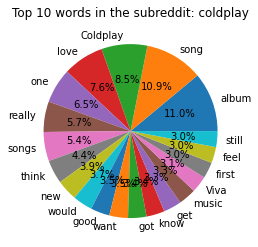

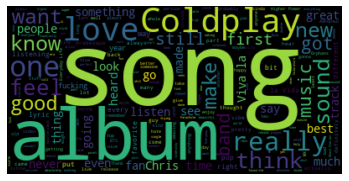

In [1]:
import collections
import itertools
import praw 
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# start_date = input("Enter with start date: ")
# end_date = input("Enter with end date: ")
top_N = int(input("Enter with a N number: "))

reddit = praw.Reddit(
    client_id ='wbzA3Ai8w2dT3MAltsMG-g', 
    client_secret ='jzeAgrSIgEzTPoCGZXjuyVaESvRCHw', 
    user_agent ='coldplay 1.0 by /u/kampuzzle', 
    username ='kampuzzle', 
    password ='machinelearningcourse'
)

subreddit = reddit.subreddit('coldplay')

stop_words = [
    'the', 'to', 'and', 'a', 'in', 'it', 'is', 'i', 'like','that', 'had', 'on', 'for', 'were', 'was', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'oh', "i'm", "that's", "it's", "i've", "i'll"
]

words = []

for submission in subreddit.top(limit=100):
    submission.comments.replace_more(limit=0)
    for top_level_comment in submission.comments:
        word = ""
        for letter in top_level_comment.body:
            if letter == ' ':
                if not word.lower() in stop_words and word.isalnum():
                    words.append(word)
                word = ""
            else:
                word += letter

counts = collections.Counter(words)
list(itertools.chain.from_iterable([[k for _ in range(counts[k])] for k in sorted(counts, key=counts.__getitem__, reverse=True)]))

top_list = sorted(counts, key=counts.__getitem__, reverse=True)


# print(counts)
# print(top_list)

i = 0
top_words = []
top_count = []

while i < top_N:
    top_words.append(top_list[i])
    top_count.append(words.count(top_list[i]))
    print(top_list[i], words.count(top_list[i]))
    i+=1


plt.title('Top 10 words in the subreddit: ' + subreddit.display_name)
plt.pie(top_count, labels=top_words, autopct='%1.1f%%')
plt.show()

top_to_string = ' '.join(map(str,words))

wordcloud = WordCloud().generate(top_to_string)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()